In [1]:
import display
import hopfield_net
import read_csv

In [2]:
CONST_ACTIVATION_FUNCTIONS = ['signum', 'heavy_side']
CONST_DYNAMICS_TYPE = ['asynchronous', 'synchronous']

In [3]:
datasets = ["animals-14x9.csv",
                "large-25x25.csv",
                "large-25x50.csv",
                "letters-14x20.csv",
                "letters-abc-8x12.csv",
                "OCRA-12x30-cut.csv",
                "small-7x7.csv"]

In [40]:
train, dims = read_csv.read_patterns('./../data/hopfield/' + datasets[0])
num_of_patterns = train.shape[0]

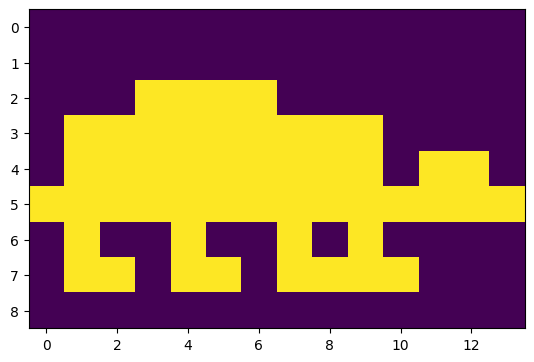

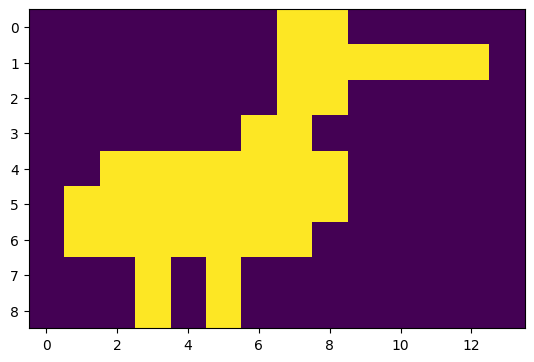

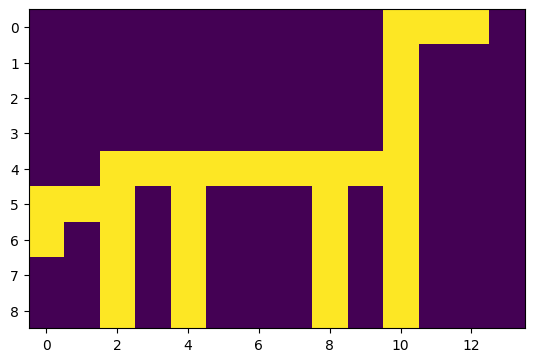

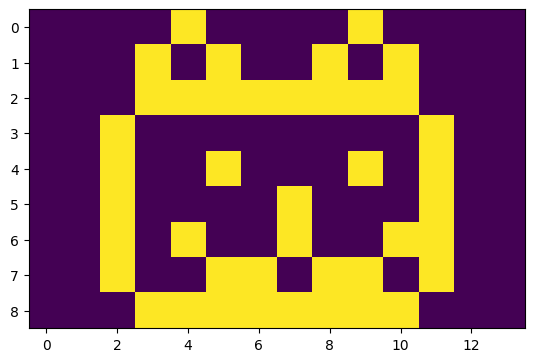

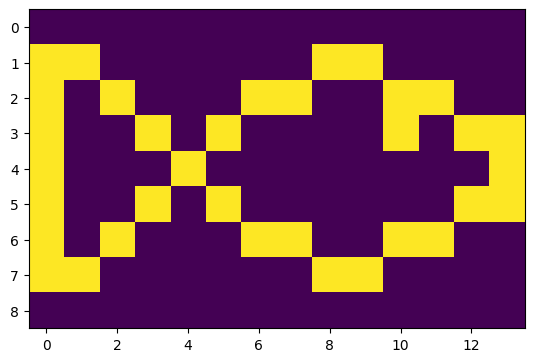

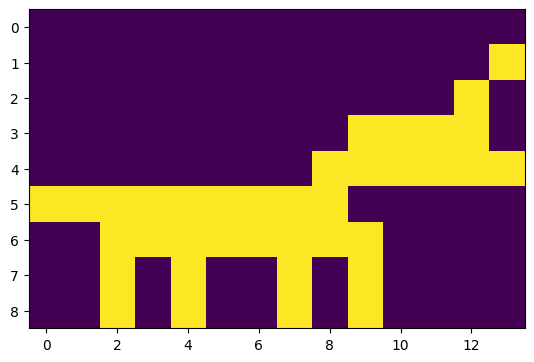

In [41]:
# save training data as .png
for i in range(num_of_patterns):
    display.save_img(train[i], dims, "./../data/hopfield/train/p" + str(i+1) + ".png")

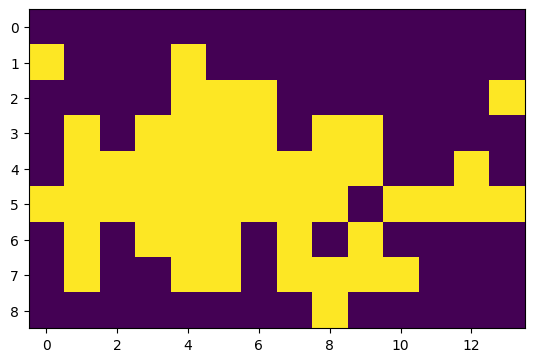

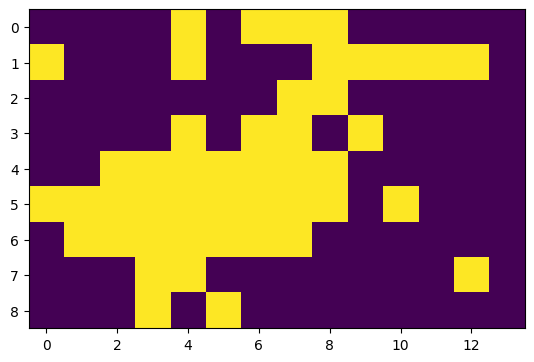

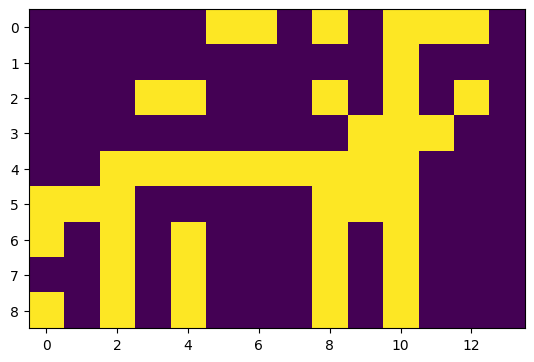

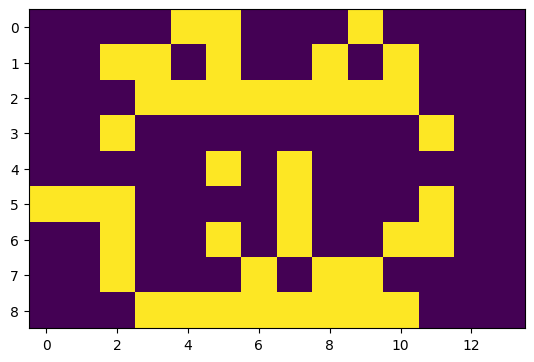

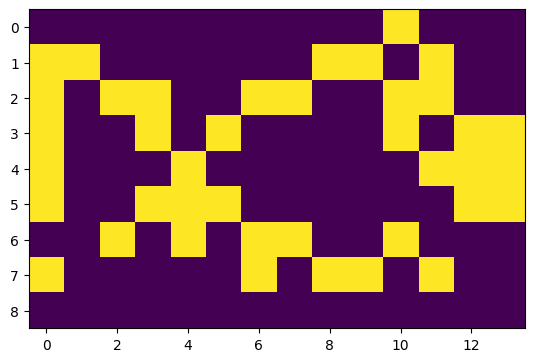

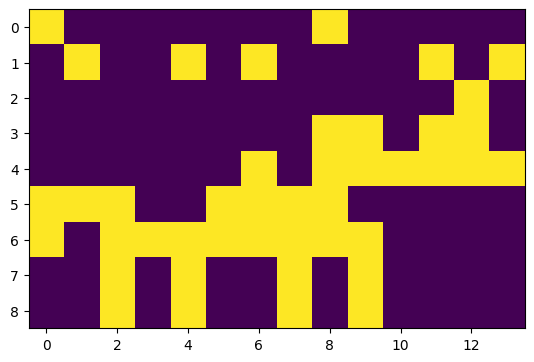

In [42]:
X = []
for i in range(num_of_patterns):
    X.append(read_csv.noise(train[i], 0.1))
    display.save_img(X[-1], dims, "./../data/hopfield/noise/n" + str(i+1) + ".png")

In [43]:
n = dims[0] * dims[1]
# activation function 0 - signum, 1 - heaviside
activation = 0
# dynamics type 0 - asynchronous, 1 - synchronous
dynamics = 0

In [35]:
HN = hopfield_net.HopfieldNet(
        n = n,
        activation = CONST_ACTIVATION_FUNCTIONS[activation],
        dynamics = CONST_DYNAMICS_TYPE[dynamics]
    )

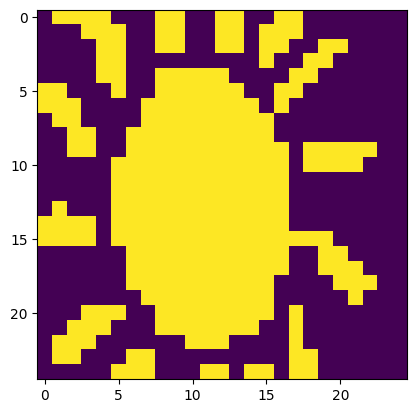

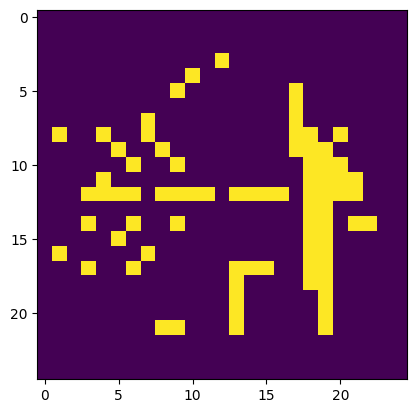

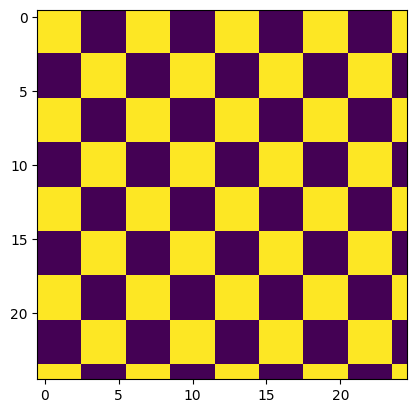

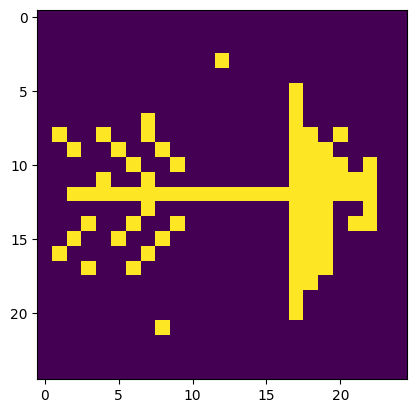

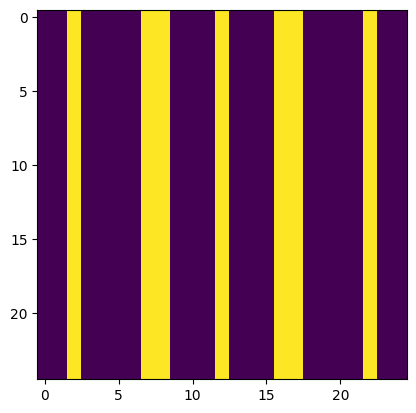

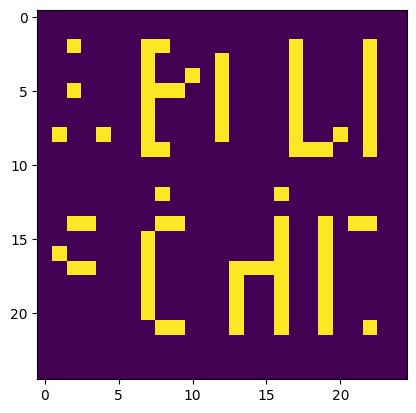

In [36]:
HN.HEBB_training(train)
for i in range(num_of_patterns):
    last_x = HN.forward(dims, init_x = X[i], epochs = 200, animation = False)
    display.save_img(last_x, dims, "./../data/hopfield/hebb/h" + str(i+1) + ".png")

In [44]:
HN2 = hopfield_net.HopfieldNet(
    n = n,
    activation = CONST_ACTIVATION_FUNCTIONS[activation],
    dynamics = CONST_DYNAMICS_TYPE[dynamics]
)


6
Oja epoch # 1
row:  [1.        1.        1.        1.        0.6666667 0.       ]
Oja epoch # 2
row:  [0.8660676  0.8657564  0.86544704 0.86513966 0.60974324 0.        ]
Oja epoch # 3
row:  [0.7725112  0.7719006  0.7712933  0.77068937 0.56664014 0.        ]
Oja epoch # 4
row:  [0.7024527  0.70159584 0.7007435  0.6998956  0.53231853 0.        ]
Oja epoch # 5
row:  [0.6475127 0.6464598 0.6454125 0.6443707 0.5040437 0.       ]
Oja epoch # 6
row:  [0.6029831  0.6017751  0.60057354 0.5993784  0.4801687  0.        ]
Oja epoch # 7
row:  [0.56598395 0.56465274 0.5633289  0.5620124  0.45962727 0.        ]
Oja epoch # 8
row:  [0.5346396  0.5332102  0.53178906 0.53037596 0.44169083 0.        ]
Oja epoch # 9
row:  [0.5076686  0.50616074 0.5046618  0.5031717  0.42584056 0.        ]
Oja epoch # 10
row:  [0.48416162 0.48259073 0.48102954 0.4794779  0.41169447 0.        ]
Oja epoch # 11
row:  [0.46345285 0.46183142 0.46022034 0.4586195  0.39896372 0.        ]
Oja epoch # 12
row:  [0.44504228 0.44338

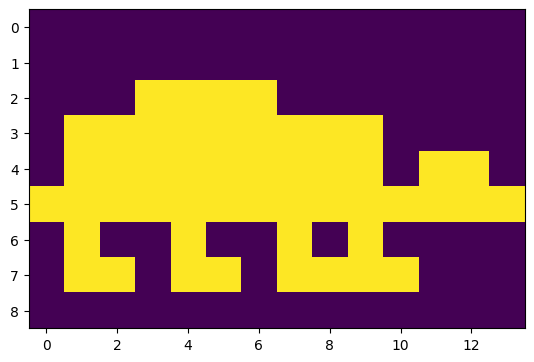

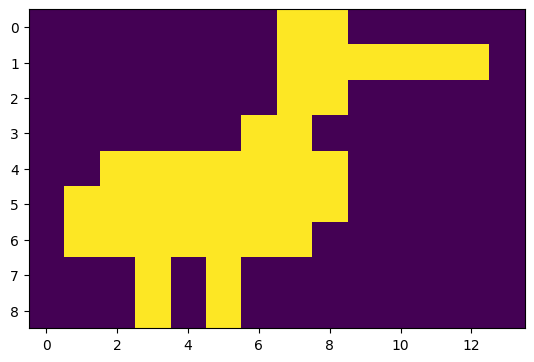

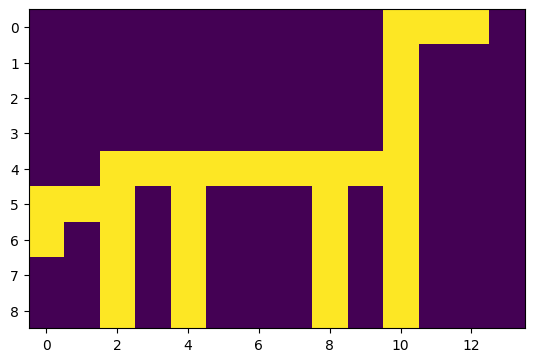

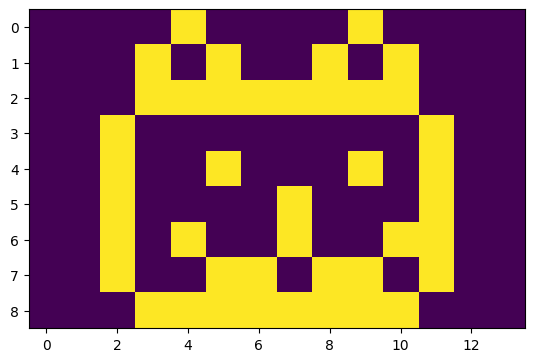

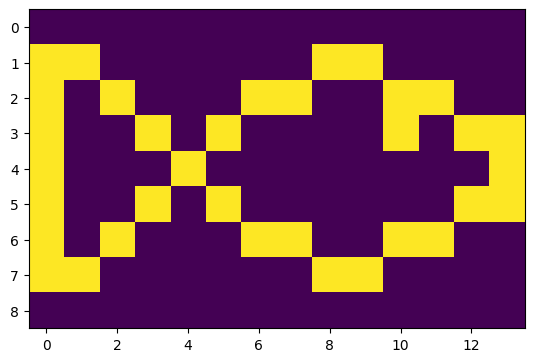

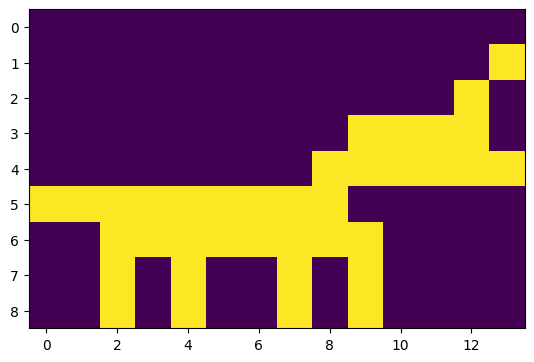

In [45]:
HN2.OJA_training(train, 30, eta=0.0001)
for i in range(num_of_patterns):
    #wait = input()
    last_x = HN2.forward(dims, init_x = X[i], epochs = 100, animation = False)
    display.save_img(last_x, dims, "./../data/hopfield/oja/o" + str(i+1) + ".png")
    #wait = input()
    #last_x = HN.forward(dims, init_x = last_x, epochs = 10, animation = False)
    #display.save_img(last_x, dims, "../test/oja/o" + str(i+1) + ".png")